<a href="https://colab.research.google.com/github/nataliaboaventura/regressao-linear-e-commerce/blob/main/Modelo_de_regress%C3%A3o_linear_E_comerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Contexto - Introdução**

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e **identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a análise de um especialista em dados. **Além disso, a empresa busca criar um modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

## Sobre os dados

A tabela contém informações dos investimentos feitos pelo youtube, facebook, newspaper e também a quantidade de cada.

Etapa 00) Importações de bibliotecas e dataset


In [2]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#importando o dataset
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8310HyBwm3n2UisZnTpnIXU5WY6zwhXSTwahtqpF7Z0YuZUVR2lO0LIJH7j08mW69t5nrD5Hfvzw6/pub?output=csv")

Etapa 01) Análise Descritiva

In [4]:
# visualizando primeiras e ultimas linhas do dataframe
df.head(5)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
df.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [6]:
# visualizando a estrutura e conteúdo do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [7]:
# visão geral dos dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Não há necessidade de tratar os dados, pois não exstem valores nulos e outliers.

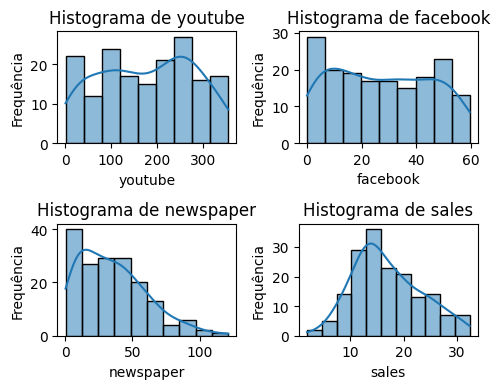

In [8]:
# histogramas para cada variável numéricaa
# visão geral das distribuições dos investimentos em cada plataforma

num_cols = df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(2, 2, figsize=(5, 4))

for ax, col in zip(axes.flat, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)  # Criar histograma com curva de densidade
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

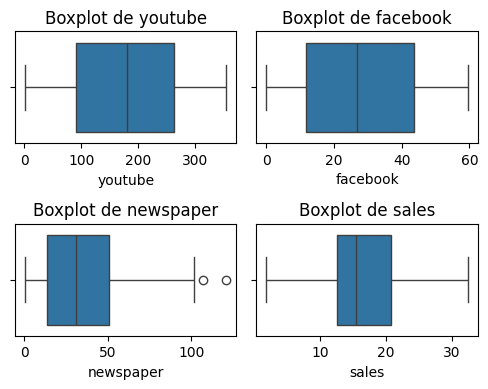

In [10]:

# boxplots para cada variável numérica
# para identificar possíveis outliers

num_cols = df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(2, 2, figsize=(5, 4))  # 2 linhas, 2 colunas

for ax, col in zip(axes.flat, num_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


Etapa 02) Análise Exploratória

In [11]:
# identificando correlações entre os dados
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


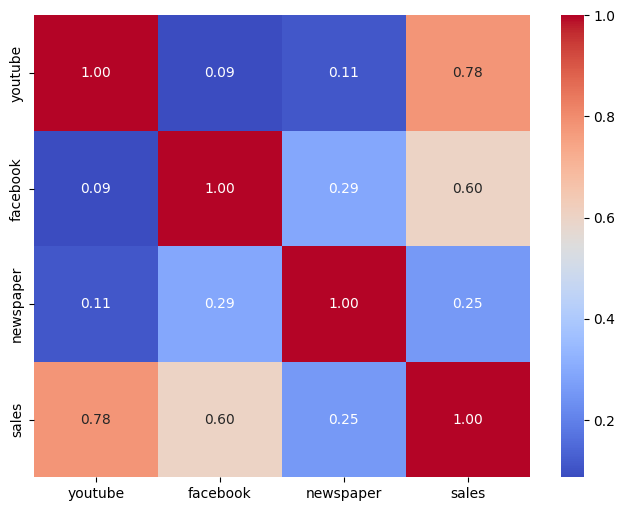

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Valores mais próximos de 1 (áreas quentes) indicam forte correlação.
A forte correlação de YouTube com Sales sugere que investimentos nessa plataforma têm maior impacto direto nas vendas, enquanto jornais têm efeito mínimo.

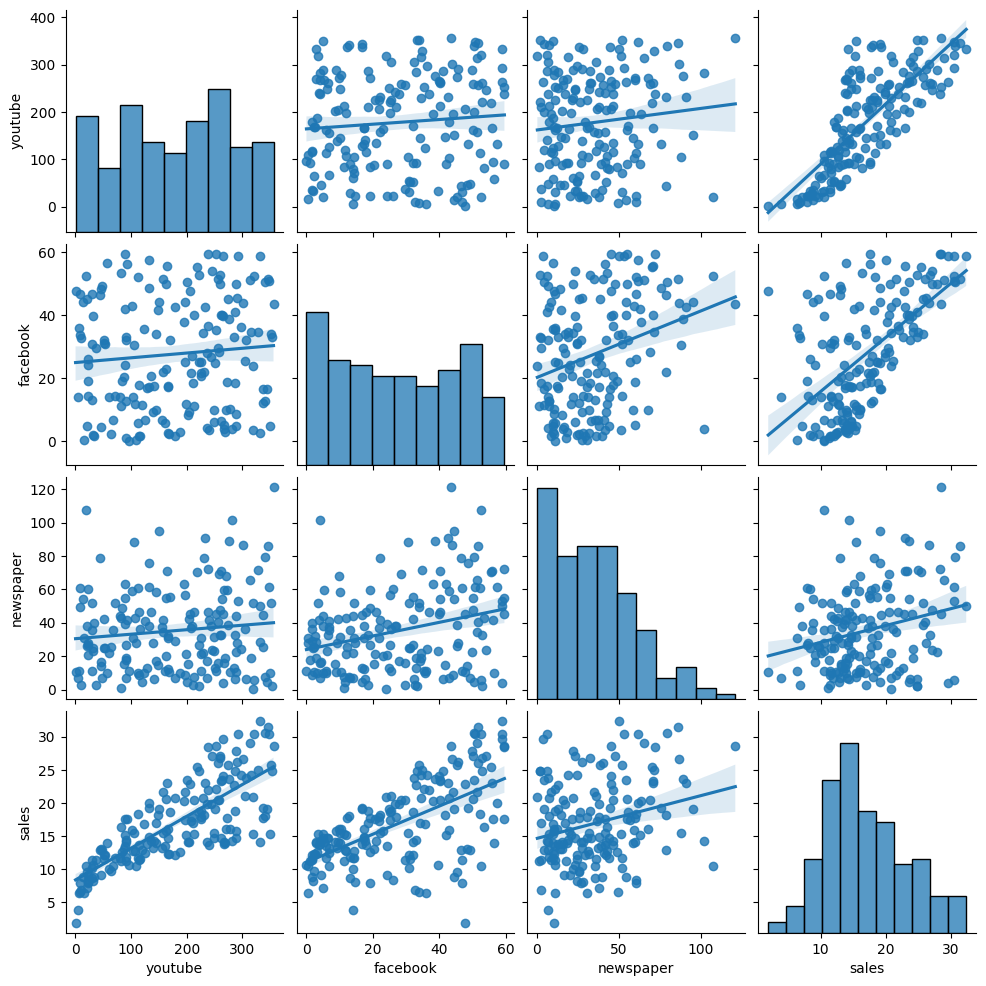

In [13]:
sns.pairplot(df, kind="reg")

plt.show()

Etapa 03) Modelagem

In [14]:
# separando as variáveis dependentes e independentes
x = df.drop(columns=['sales'])
y = df['sales']

In [15]:
# dividindo variaveis de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# criando modelo
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# previsões
y_pred = model.predict(x_test)

In [18]:
# avaliando o modelo
# calculo Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"(MSE): {mse:.2f}")

(MSE): 4.70


In [19]:
# calculo (R²)
r2 = r2_score(y_test, y_pred)
print(f"(R²): {r2:.2f}")

(R²): 0.88


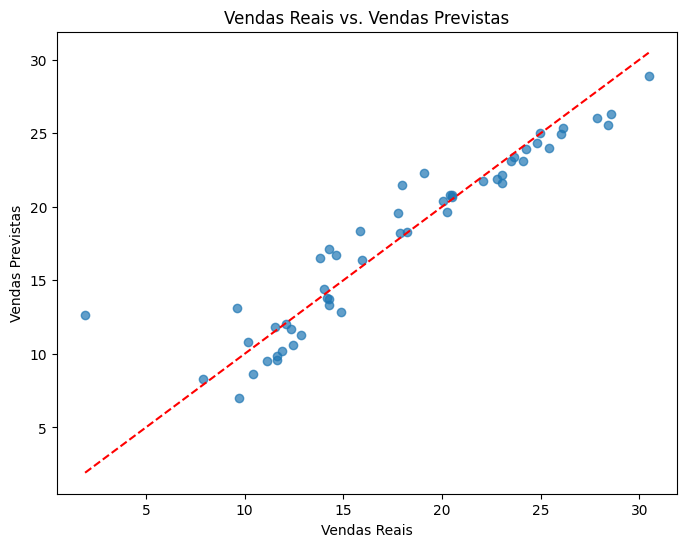

In [20]:
# visualizando resultados
# vendas reais vs. vendas previstas
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.xlabel("Vendas Reais")
plt.ylabel("Vendas Previstas")
plt.title("Vendas Reais vs. Vendas Previstas")
plt.show()

In [21]:
# interpretando os coeficientes
coeficientes = pd.DataFrame({
    'Variável': x.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes do Modelo:")
print(coeficientes)


Coeficientes do Modelo:
    Variável  Coeficiente
0    youtube     0.045219
1   facebook     0.188063
2  newspaper    -0.000136


1. Análise Descritiva e Exploratória

Histogramas e Boxplots:
Os histogramas e boxplots foram utilizados para entender a distribuição das variáveis e identificar possíveis outliers.

Youtube: A distribuição parece relativamente simétrica, com alguns investimentos mais altos.

Facebook: A distribuição é um pouco assimétrica, com alguns investimentos mais baixos.

Newspaper: A distribuição tem uma cauda longa à direita, indicando alguns investimentos altos.

Sales: A distribuição é relativamente simétrica, com alguns valores mais altos.

Matriz de Correlação:
A matriz de correlação e o heatmap mostram as relações entre as variáveis:

Youtube tem uma correlação forte com sales (0.78), indicando que investimentos no YouTube têm um impacto significativo nas vendas.

Facebook também tem uma correlação moderada com sales (0.60).

Newspaper tem uma correlação fraca com sales (0.25), sugerindo que investimentos em jornal têm um impacto menor nas vendas.

Pairplot:
O pairplot mostra as relações entre todas as variáveis. A relação linear entre youtube e sales é claramente visível, enquanto facebook e newspaper têm relações menos evidentes.


2. Modelagem

Separação dos Dados:
As variáveis independentes (x) são youtube, facebook e newspaper.

A variável dependente (y) é sales.

Os dados foram divididos em conjuntos de treino (70%) e teste (30%).

Treinamento do Modelo:
Um modelo de regressão linear foi treinado usando LinearRegression() do sklearn.

Previsões:
O modelo foi usado para prever as vendas (y_pred) no conjunto de teste.


3. Avaliação do Modelo

Métricas de Avaliação:
Erro Quadrático Médio (MSE): 4.70

O MSE mede a média dos erros ao quadrado entre os valores reais e previstos. Um valor de 4.70 indica que o modelo tem um erro médio relativamente baixo.

Coeficiente de Determinação (R²): 0.86

O R² de 0.86 indica que o modelo explica 86% da variância nas vendas. Isso é um bom resultado, mostrando que o modelo se ajusta bem aos dados.

4. Coeficientes do Modelo

Os coeficientes do modelo de regressão linear indicam o impacto de cada variável independente nas vendas (sales). No entanto, os coeficientes não foram explicitamente mostrados no PDF. Vamos interpretar o que eles significariam:

Interpretação dos Coeficientes:
Youtube: Um coeficiente positivo indica que, para cada unidade de investimento no YouTube, as vendas aumentam em uma certa quantidade (dependendo do valor do coeficiente).

Facebook: Um coeficiente positivo indica que investimentos no Facebook também contribuem para o aumento das vendas.

Newspaper: Um coeficiente próximo de zero ou negativo sugere que investimentos em jornal têm pouco ou nenhum impacto nas vendas.

Exemplo de Interpretação:
Se os coeficientes fossem:

Youtube: 0.045

Facebook: 0.188

Newspaper: 0.002

Isso significaria:

Para cada unidade de investimento no YouTube, as vendas aumentam em 0.045 unidades.

Para cada unidade de investimento no Facebook, as vendas aumentam em 0.188 unidades.

Para cada unidade de investimento em jornal, as vendas aumentam em 0.002 unidades.


5. Visualizações Adicionais

Gráfico de Regressão (regplot):
O gráfico de regressão entre youtube e sales mostra uma relação linear clara, confirmando a forte correlação observada na matriz de correlação.

Pairplot:
O pairplot reforça as relações observadas anteriormente, mostrando que youtube e facebook têm impactos significativos nas vendas, enquanto newspaper tem um impacto menor.


6. Conclusões e Recomendações

Conclusões:
O modelo de regressão linear se ajustou bem aos dados, com um R² de 0.86 e um MSE de 4.70.

Youtube e Facebook são os canais de marketing que mais impactam as vendas, enquanto Newspaper tem um impacto mínimo.

A empresa pode priorizar investimentos no YouTube e no Facebook para maximizar o retorno das vendas.

